In [1]:
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False

In [2]:
from model_comparer import ModelComparer
import warnings
from matplotlib import pyplot as plt
warnings.filterwarnings('ignore')
from plotting import fig_saver
import gas_phase_data

/home/daniel/surp/VICE/vice/__init__.py:141: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


In [3]:
import sys
sys.path.append("../")
import surp

In [4]:
mc = ModelComparer(["cristallo11", "cristallo11_reduced_eta_n", "cristallo11_lc18"])

# Mean abundance star tracks

In [ ]:
mc.plot_all_mean_stars(filename="stars_eta")

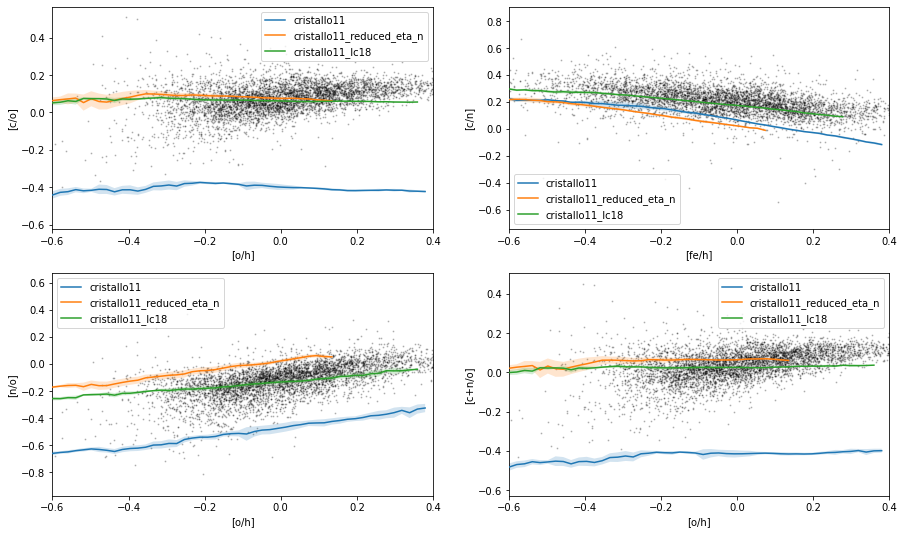

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

In [25]:
fig, axs = plt.subplots(2, 2, figsize=(15, 9))
for n in range(4):
    i = n % 2
    j = n // 2

    ax = axs[i][j]
    x = ["[o/h]", "[o/h]", "[fe/h]", "[o/h]"][n]
    y = ["[c/o]", "[n/o]", "[c/n]", "[c+n/o]"][n]
    mc.plot_mean_stars(x, y, xlim=(-0.6, 0.4), ax=ax)

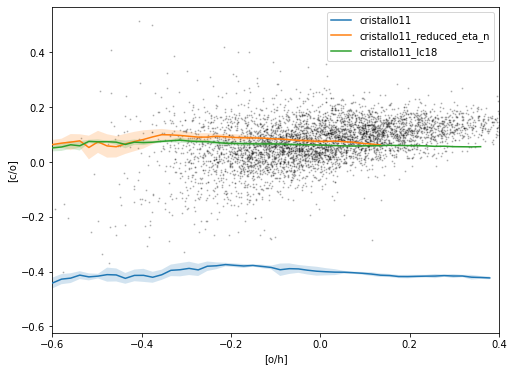

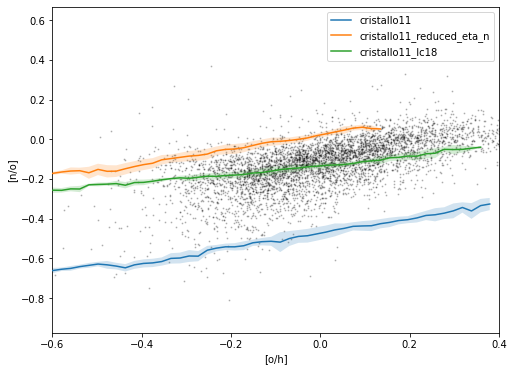

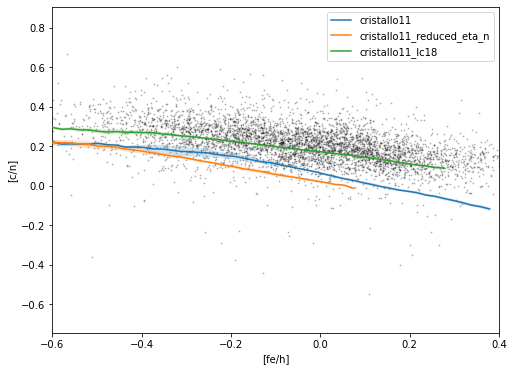

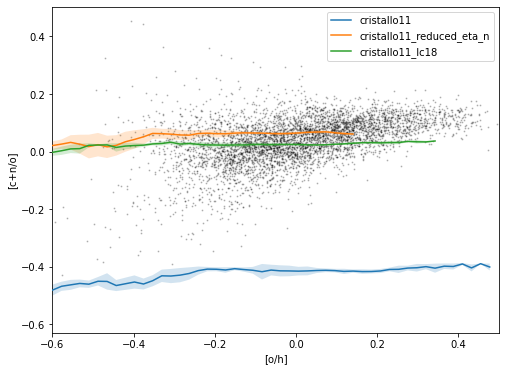

In [5]:
mc.plot_mean_stars("[o/h]", "[c/o]", xlim=(-0.6, 0.4), filename="cooh_stars_eta")
mc.plot_mean_stars("[o/h]", "[n/o]", xlim=(-0.6, 0.4), filename="nooh_stars_eta")
mc.plot_mean_stars("[fe/h]", "[c/n]", xlim=(-0.6, 0.4), filename="cnfeh_stars_eta")
mc.plot_mean_stars("[o/h]", "[c+n/o]", xlim=(-0.6, 0.5))

note, why is the lc18 model above the amplified model. Oxygen cc yields changed from 0.015 to 0.012, causing C/O to go up more than the extra agb tripleing contribution in the amplified model. The difference in CC yields is about 0.05 dex.

# Gas phase tracks

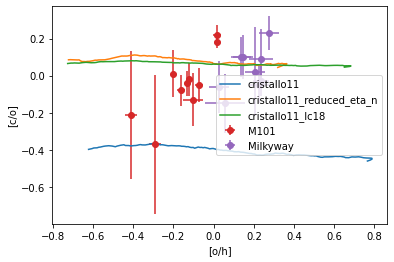

In [7]:
mc.plot_gas("[o/h]", "[c/o]")
# mc.plot_gas("[fe/h]", "[c/n]")

# MDFs

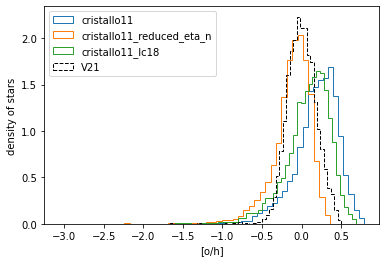

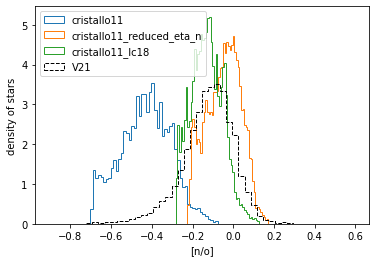

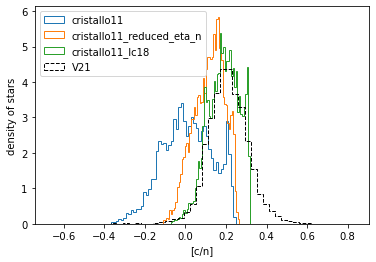

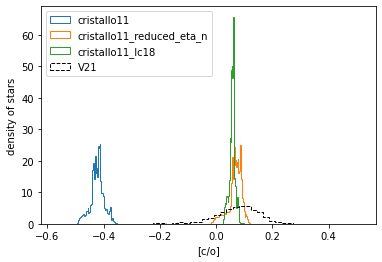

In [8]:
mc.plot_mdf("[o/h]")
mc.plot_mdf("[n/o]")
mc.plot_mdf("[c/n]")
mc.plot_mdf("[c/o]")

# Stars

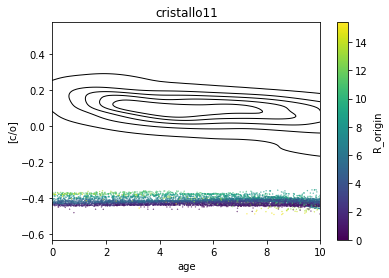

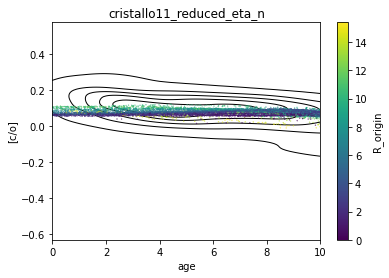

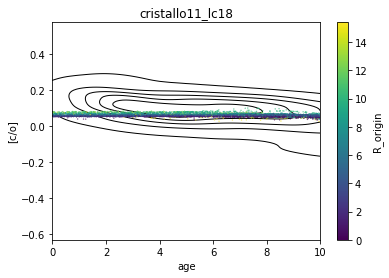

In [9]:
mc.plot_stars("age", "[c/o]", c="R_origin", xlim=(0, 10))

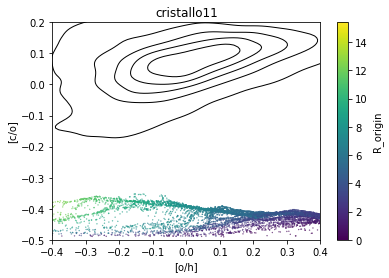

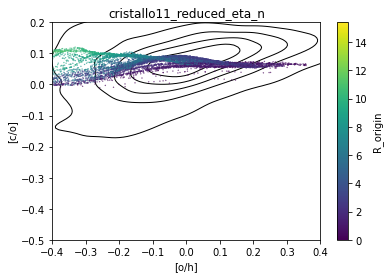

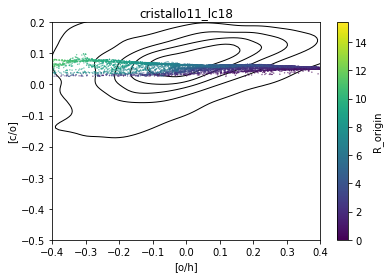

In [10]:
mc.plot_stars("[o/h]", "[c/o]", c="R_origin", xlim=(-0.4, 0.4), ylim=(-0.5, 0.2))

# Gas phase tracks

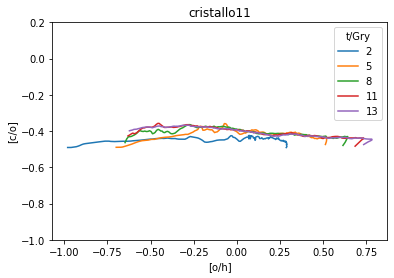

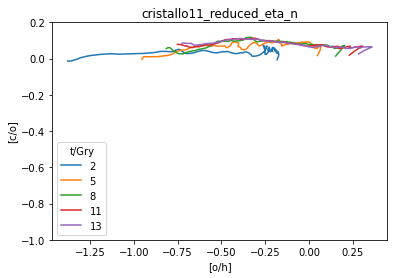

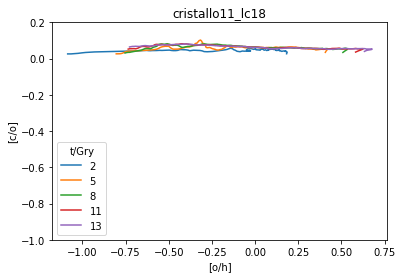

In [11]:
mc.plot_model_fixed_t(ylim=(-1, 0.2))

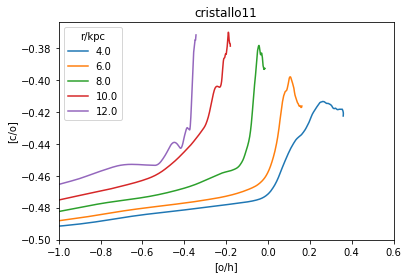

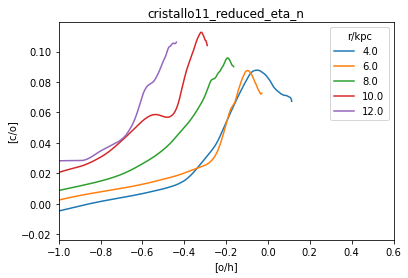

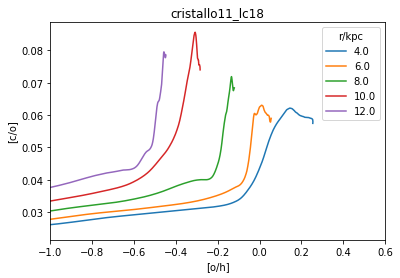

In [12]:
mc.plot_model_fixed_r()